## EXPLORATORY DATA ANALYSIS ON A DATASET

Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
Dataset:
1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


In [159]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import matplotlib
from scipy.stats import zscore
warnings.filterwarnings("ignore")
%matplotlib inline

### 1.	Data Cleaning and Preparation:

In [160]:
# Importing Dataset
data = pd.read_csv("Cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [161]:
data.shape

(2126, 14)

In [162]:
# Checking for Null Values
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [163]:
# Removing Null Values
data = data.dropna()

In [164]:
# Data shap after removing null values
data.shape

(2105, 14)

In [165]:
# Checking for duplicate values
data[data.duplicated()].shape

(2, 14)

In [166]:
# View of duplicate values
data[data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [167]:
# Drop duplicate values
data = data.drop_duplicates()
data.shape

(2103, 14)

In [168]:
# Ckecking for data types
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

#### Since all the columns are in float with needed data type there is no need to change the data type

In [169]:
# Rename of column one 

data = data.rename({'LB': 'BFHR'}, axis=1)
data

,BFHR,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


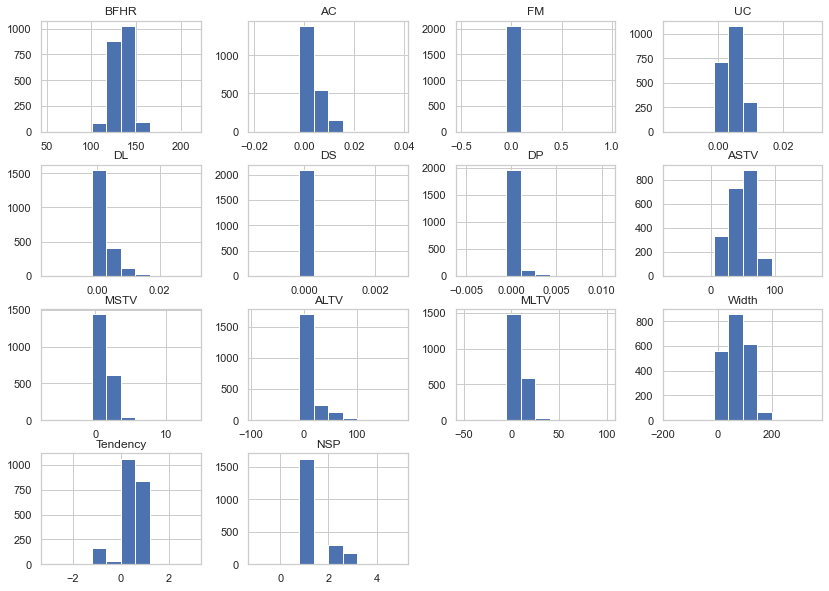

In [170]:
# Outlier detection
data.hist(figsize=[14, 10]) 
plt.show() 

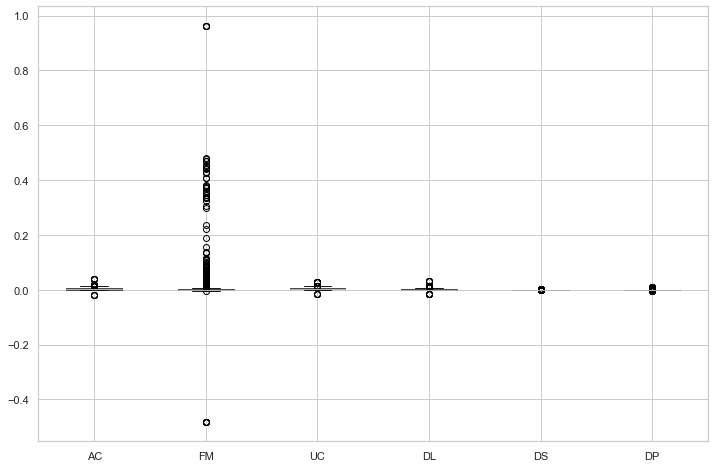

In [171]:
data.boxplot(figsize=[12, 8], column=['AC', 'FM', 'UC', 'DL', 'DS', 'DP'])
plt.show()

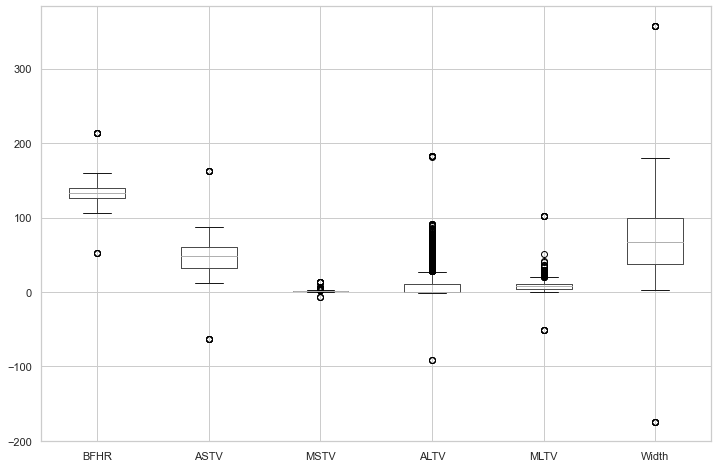

In [172]:
data.boxplot(figsize=[12, 8], column=['BFHR', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width'])
plt.show()

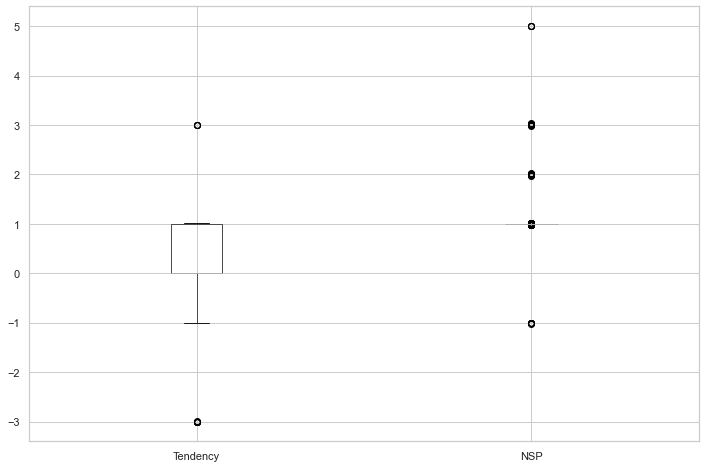

In [173]:
data.boxplot(figsize=[12, 8], column=['Tendency', 'NSP'])
plt.show()

#### The above plotes clearly show the outlier in almost every column. Hence we need to treat these outlier to get better results

In [174]:
# Calculate Z-scores for all columns
z_scores = data.apply(zscore)

# Define a threshold to identify outliers
threshold = 3

# Identify rows with any Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
data_cleaned = data[~outliers]

data_cleaned.shape

(1908, 14)

### 2. Statistical Summary:

In [175]:
#Descriptive stat
data_cleaned.describe()

,BFHR,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,133.171798,0.003170,0.002720,0.004344,0.001687,-0.000005,0.000091,46.600777,1.272484,9.187582,8.163411,68.337982,0.326511,1.243219
std,10.443682,0.003849,0.030338,0.003035,0.002845,0.000082,0.000480,17.766077,0.818170,17.259187,6.035309,39.734683,0.625168,0.552221
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.001906,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.900000,36.000000,0.000000,1.000000
50%,133.000000,0.001696,0.000000,0.004548,0.000000,0.000000,0.000000,48.000000,1.110875,0.000000,7.500000,65.000000,0.000000,1.000000
75%,141.000000,0.005817,0.002275,0.006579,0.003035,0.000000,0.000000,61.000000,1.700000,11.000000,10.925000,98.000000,1.000000,1.000000
max,160.000000,0.016000,0.189320,0.013861,0.011837,0.000006,0.002674,87.000000,4.800000,74.000000,29.500000,180.000000,1.023635,3.034545


In [176]:
data_cleaned.var()

BFHR        1.090705e+02
AC          1.481733e-05
FM          9.203816e-04
UC          9.209030e-06
DL          8.091497e-06
DS          6.697222e-09
DP          2.305716e-07
ASTV        3.156335e+02
MSTV        6.694028e-01
ALTV        2.978795e+02
MLTV        3.642496e+01
Width       1.578845e+03
Tendency    3.908346e-01
NSP         3.049479e-01
dtype: float64

### Insights Based on Statistical Summary
**1. Baseline Fetal Heart Rate (BHR)**
Mean: 133.17 bpm <br>
Standard Deviation: 10.44 bpm <br>
Range: 51.8 bpm to 160.0 bpm <br>
Insight: The average BHR is within the normal range, but the wide range and moderate standard deviation suggest significant variability. The minimum value of 51.8 bpm may indicate an outlier or measurement error.

**2. Accelerations (AC) and Fetal Movements (FM)**
Mean: 0.00 for both <br>
Insight: The absence of accelerations and fetal movements is unusual and might indicate data recording issues or a specific condition in the population studied.

**3. Uterine Contractions (UC) and Decelerations (DL, DS, DP)**
Mean: 0.00 for all <br>
Insight: The lack of uterine contractions and decelerations suggests either a focus on a specific clinical condition or data collection limitations.

**4. Short Term Variability (ASTV, MSTV)**
ASTV: Mean = 46.6%, Std Dev = 17.7% <br>
MSTV: Mean = 1.27, Std Dev = 0.81 <br>
Insight: A significant percentage of time with abnormal short-term variability indicates potential fetal distress, necessitating continuous monitoring.

**5. Long Term Variability (ALTV, MLTV)**
ALTV: Mean = 9.18%, Std Dev = 17.2% <br>
MLTV: Mean = 8.16, Std Dev = 6.03 <br>
Insight: Considerable abnormal long-term variability suggests potential fetal health issues, requiring close monitoring.

**6. Other Variables**
Width: Mean = 68.3, Std Dev = 39.7 <br>
Tendency: Mean = 0.32, Std Dev = 0.62 <br>
NSP: Mean = 1.24, Std Dev = 0.55

### Overall Conclusions and Suggestions
1) **High Variability:** A diversified dataset with a range of foetal health problems is suggested by the significant variability in key parameters. To pinpoint particular at-risk populations, a more detailed investigation is required.

2) **Absence of Expected Signals:** It is unusual to see no accelerations or decelerations, which suggests that you should speak with the data supplier for further information.

3) **Focus on Variability:** Pay Attention to Variability High proportions of anomalous long- and short-term fluctuation point to possible issues that need to be carefully watched.

4) **Further Research:** For thorough foetal health monitoring, a closer examination of specific cases—especially outliers—is advised.

### 3.Data Visualization:

In [177]:
data_cleaned.corr()

,BFHR,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
BFHR,1.000000,-0.079591,0.015970,-0.154095,-0.141320,-0.005592,-0.102646,0.299314,-0.280040,0.290510,-0.039147,-0.140951,0.267665,0.184715
AC,-0.079591,1.000000,0.080468,0.081017,-0.078043,-0.020249,-0.093278,-0.273603,0.223185,-0.373564,-0.141331,0.303279,0.008264,-0.358057
FM,0.015970,0.080468,1.000000,-0.064175,-0.027752,0.141814,-0.002662,-0.016230,0.093475,-0.006347,-0.008338,0.079147,0.009158,-0.028575
UC,-0.154095,0.081017,-0.064175,1.000000,0.241462,0.000304,0.157742,-0.184686,0.275879,-0.277600,-0.076883,0.103926,-0.103257,-0.175696
DL,-0.141320,-0.078043,-0.027752,0.241462,1.000000,0.024329,0.229382,-0.088069,0.514365,-0.243963,-0.185765,0.477799,0.051770,0.008522
DS,-0.005592,-0.020249,0.141814,0.000304,0.024329,1.000000,0.011713,-0.019916,0.021328,-0.020084,0.005347,0.027986,0.017724,-0.004455
DP,-0.102646,-0.093278,-0.002662,0.157742,0.229382,0.011713,1.000000,0.057733,0.236321,-0.118856,-0.201583,0.179104,-0.121484,0.355505
ASTV,0.299314,-0.273603,-0.016230,-0.184686,-0.088069,-0.019916,0.057733,1.000000,-0.387328,0.410843,-0.283298,-0.197396,0.004653,0.454404
MSTV,-0.280040,0.223185,0.093475,0.275879,0.514365,0.021328,0.236321,-0.387328,1.000000,-0.454858,0.036406,0.583952,-0.043776,-0.136384
ALTV,0.290510,-0.373564,-0.006347,-0.277600,-0.243963,-0.020084,-0.118856,0.410843,-0.454858,1.000000,-0.131019,-0.384530,0.032037,0.401906


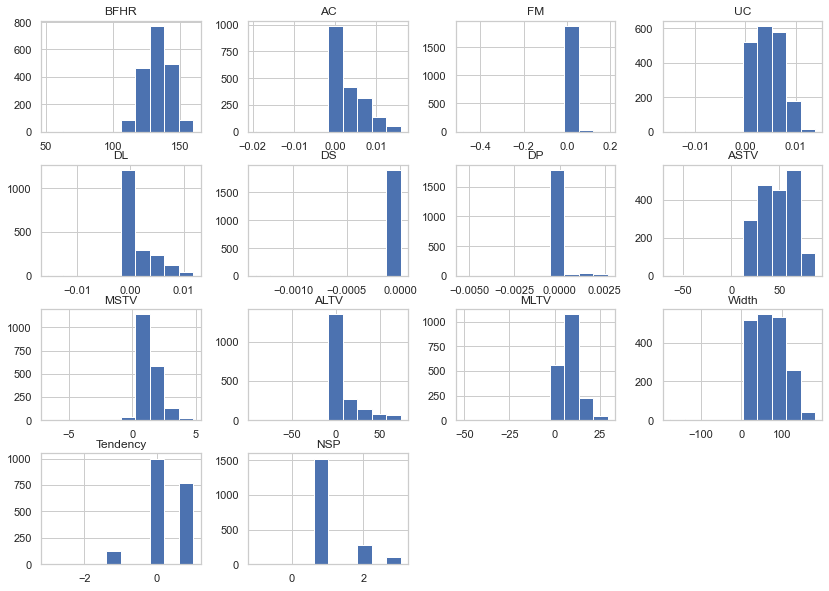

In [178]:
data_cleaned.hist(figsize=[14, 10]) 
plt.show() 

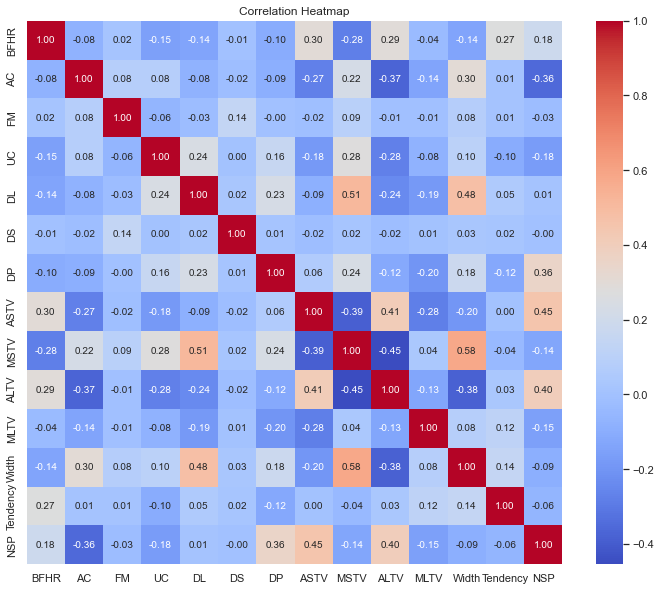

In [179]:
# Correlation heat map

corr = data_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

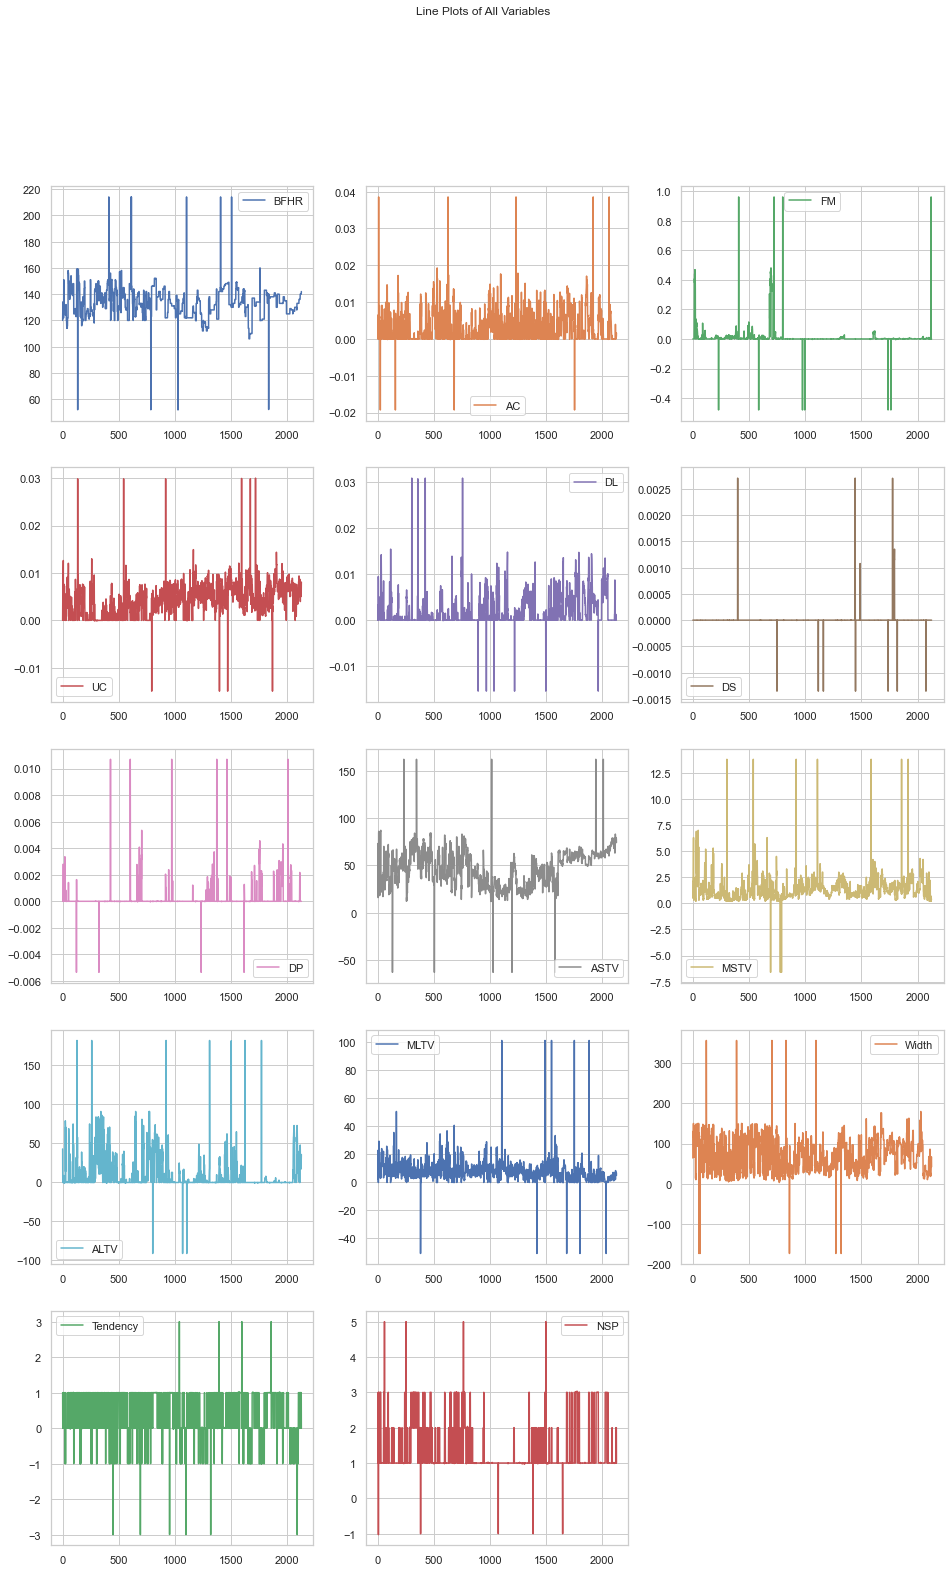

In [180]:
# Calculate the number of columns
num_columns = len(data_cleaned.columns)

# Determine the number of rows and columns for the subplots
num_rows = (num_columns + 2) // 3  # +2 to ensure rounding up

# Line Plots
data.plot(kind='line', subplots=True, layout=(num_rows, 3), figsize=(16, num_rows * 5), sharex=False)
plt.suptitle('Line Plots of All Variables')
plt.show()

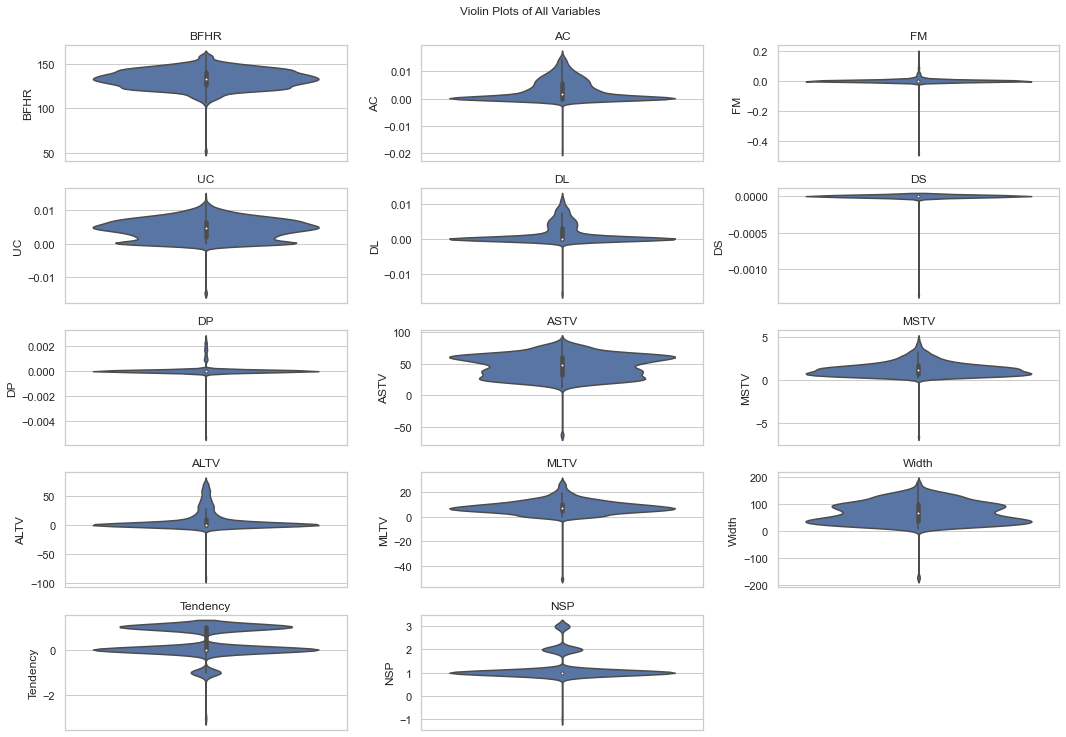

In [181]:
# Violin Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_cleaned.columns, 1):
    plt.subplot((len(data_cleaned.columns) + 2) // 3, 3, i)  # +2 to ensure rounding up
    sns.violinplot(y=data_cleaned[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Violin Plots of All Variables', y=1.02)
plt.show()

In [182]:
# Identify strong correlations (absolute value > 0.7)
correlations = data_cleaned.corr()
stat_summary_after_cleaning = data_cleaned.describe()

strong_correlations = correlations[(correlations.abs() > 0.5) & (correlations != 1.0)]
strong_correlations.dropna(axis=0, how='all', inplace=True)
strong_correlations.dropna(axis=1, how='all', inplace=True)

strong_correlations

,DL,MSTV,Width
DL,NaN,0.514365,NaN
MSTV,0.514365,NaN,0.583952
Width,NaN,0.583952,NaN


### Correlation Insights
**MLTV and Width: Positive Correlation (0.58)**
The Mean Value of Long Term Variability (MLTV) and Width exhibit a positive correlation of 0.58. This indicates that as the MLTV increases, the Width also tends to increase. In the context of fetal heart rate monitoring, this relationship suggests that higher long-term variability in the fetal heart rate is associated with a broader range of the heart rate signal. This could imply that fetuses with more pronounced long-term variability also experience a wider range of heart rate changes, potentially reflecting a dynamic response to various physiological conditions.
<br>

**MSTV and DL: Positive Correlation (0.51)**
The Mean Value of Short Term Variability (MSTV) and Decelerations Late (DL) show a positive correlation of 0.51. This signifies that an increase in short-term variability is often accompanied by an increase in late decelerations. Late decelerations are typically a sign of fetal distress, occurring in response to uterine contractions. The positive correlation suggests that fetuses exhibiting higher short-term variability might also be more susceptible to experiencing late decelerations. This relationship could be indicative of underlying stress or other factors affecting fetal well-being, warranting closer observation and potentially more frequent monitoring.

### Conclusion and Recommendations

**Baseline Fetal Heart Rate (BHR):** The mean BHR is 133.17 bpm with a standard deviation of 10.44 bpm, indicating a normal average but significant variability. The wide range from 51.8 bpm to 160.0 bpm suggests potential outliers or measurement errors. <br>
**Accelerations (AC) and Fetal Movements (FM):** Both have a mean of almost 0, indicating an unusual absence that might suggest data recording issues or specific conditions in the population studied. <br>
**Uterine Contractions (UC) and Decelerations (DL, DS, DP):** All have a mean of 0.00, suggesting either a focus on a specific clinical condition or limitations in data collection.<br>
**Short Term Variability (ASTV, MSTV):** ASTV has a mean of 46.6% with a standard deviation of 17.7%, indicating significant abnormal short-term variability. MSTV has a mean of 1.27 with a standard deviation of 0.81.<br>
**Long Term Variability (ALTV, MLTV):** ALTV has a mean of 9.18% with a standard deviation of 17.2%, while MLTV has a mean of 8.16 with a standard deviation of 6.03. Both indicate considerable abnormal long-term variability.<br>
**Other Variables:** Width has a mean of 68.3 with a standard deviation of 39.7, Tendency has a mean of 0.32 with a standard deviation of 0.62, and NSP has a mean of 1.24 with a standard deviation of 0.55.<br>

### Implications for Decision-Making and Further Analyses
**High Variability:** <br>
The dataset exhibits significant variability in key parameters, suggesting a diverse range of fetal health conditions. This necessitates a more detailed investigation to identify specific at-risk populations.

**Focus on Variability:** <br>
The high percentages of abnormal short-term and long-term variability indicate potential issues with fetal health that require continuous and careful monitoring. Identifying patterns in these variables can help in early detection of fetal distress. <br>

**Absence of Expected Signals:** <br>
The absence of accelerations and decelerations is unusual and warrants consultation with the data provider to ensure data accuracy and completeness. This step is crucial for validating the analysis and drawing reliable conclusions. <br>

**Further Research:**<br>
A closer examination of specific cases, especially outliers, is recommended for a thorough understanding of fetal health. This can help in tailoring monitoring protocols and interventions to improve fetal outcomes.<br>


**Recommendations <br>
Data Validation:** <br>
Verify the accuracy and completeness of the data, particularly the absence of accelerations and decelerations, by consulting with the data provider.<br>

**Targeted Monitoring:** <br>
Implement focused monitoring protocols for fetuses with high long-term and short-term variability to promptly detect and address potential health issues.<br>

**Detailed Case Studies:** <br>
Conducting in-depth analyses of outlier cases to understand the underlying causes and implications for fetal health, which can inform more personalized healthcare strategies. <br>

**Predictive Modeling:** <br>
Building predictive models using these variables could help in early detection of fetal distress.